In [1]:
#Libraries to handle data
import numpy as np
import pandas as pd

#Libraries to visualize
import matplotlib.pyplot as plt

#Libraries for spliting data
from sklearn.model_selection import train_test_split

#Libraries for Scaling data
from sklearn.preprocessing import StandardScaler

#Libraries for modeling
from sklearn.linear_model import LogisticRegression

#Libraries for scoring
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay,roc_auc_score

# Base Model

With our data now cleaned and optimized for success in the modeling stage, our next step is to create a base model. This base model will serve as a foundation for building more advanced models and will also give us an estimation of the time required for modeling. Some models, such as SVMs or KNNs, can be time-consuming to learn, so having a base model will provide us with valuable insights into the modeling process and potential time constraints. By establishing this baseline, we can efficiently proceed with further model development and fine-tuning to achieve accurate and efficient predictions for classifying connections as `BENIGN` or `MALIGNANT` (0 or 1).

In [2]:
#Reading test set
train_df = pd.read_csv('processed/Train.csv')
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653740 entries, 0 to 653739
Columns: 79 entries, Dst Port to Class
dtypes: float64(45), int64(34)
memory usage: 394.0 MB


In [3]:
#Sanity check
train_df.head()

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Class
0,80,6,61980,8,7,326.0,11595.0,326.0,0.0,40.75000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61980,1
1,668,6,11,1,1,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1
2,5004,6,27,1,1,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,1
3,80,6,16171593,7,6,339.0,11595.0,339.0,0.0,48.42857,...,0.0,0.0,0.0,0.0,16015575.0,0.0,16015575.0,16015575.0,16171593,1
4,80,6,16035510,8,7,327.0,11595.0,327.0,0.0,40.87500,...,0.0,0.0,0.0,0.0,16016511.0,0.0,16016511.0,16016511.0,16035510,1


In [4]:
#Separating dependent and independent variables
X = train_df.drop(columns='Class')
y = train_df['Class']

In [5]:
print(X.shape,y.shape)

(653740, 78) (653740,)


In [6]:
#Sanity check
X

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
0,80,6,61980,8,7,326.0,11595.0,326.0,0.0,40.750000,...,20,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,61980
1,668,6,11,1,1,0.0,0.0,0.0,0.0,0.000000,...,40,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,11
2,5004,6,27,1,1,0.0,0.0,0.0,0.0,0.000000,...,24,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,27
3,80,6,16171593,7,6,339.0,11595.0,339.0,0.0,48.428570,...,32,0.0,0.00,0.0,0.0,16015575.0,0.000,16015575.0,16015575.0,16171593
4,80,6,16035510,8,7,327.0,11595.0,327.0,0.0,40.875000,...,20,0.0,0.00,0.0,0.0,16016511.0,0.000,16016511.0,16016511.0,16035510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653735,53,17,471510,1,1,30.0,207.0,30.0,30.0,30.000000,...,8,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0
653736,53,17,440751,1,1,44.0,60.0,44.0,44.0,44.000000,...,8,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0
653737,443,6,5087271,9,6,674.0,3007.0,517.0,0.0,74.888885,...,20,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,5087271
653738,443,6,60603520,23,24,1102.0,24381.0,517.0,0.0,47.913044,...,20,120419.0,236920.02,604028.0,23228.0,9976273.0,99368.830,10024771.0,9774613.0,60603520


Before utilizing more advanced tools like Pipelines or GridSearchCV for cross-validation and hyperparameter optimization, let's begin with a simple Logistic Regression model from sklearn. To evaluate its effectiveness, we need to create a validation set manually. Once we have determined factors like scaling and C value, we can assess the model's performance on the test set we previously prepared.

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20, random_state=42)

In [8]:
logit = LogisticRegression(C=1,penalty='l2',max_iter=1000,random_state=123)
logit.fit(X_train,y_train)

/home/mdsv9/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=1000, random_state=123)

In [9]:
train_score = logit.score(X_train,y_train)
val_score = logit.score(X_val,y_val)

print(f'Training score: {round(train_score,4)}\nValidation score: {round(val_score,4)}')

Training score: 0.9497
Validation score: 0.949


Our obtained accuracy scores are within the expected range for this type of problem, which might be attributed to the chosen C value or potential failure of our model to converge. However, this provides us with an opportunity to highlight a critical aspect for our specific scenario - the significance of a high recall score. In essence, we aim to ensure that all MALIGNANT connections are correctly identified, minimizing the possibility of evildoers slipping through undetected. Achieving a high recall score is crucial in ensuring the robustness and effectiveness of our model in detecting and classifying malicious network connections correctly.

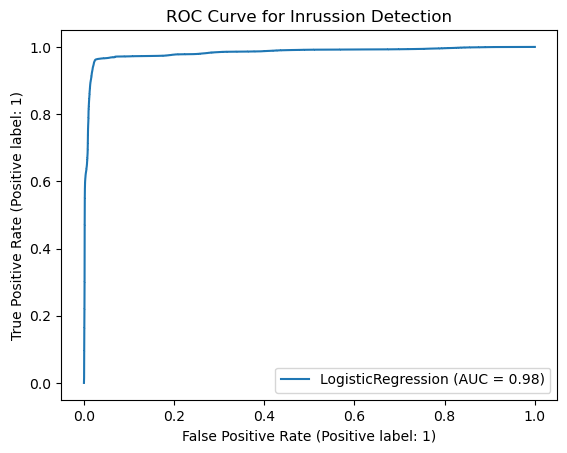

In [10]:
RocCurveDisplay.from_estimator(logit, X_val, y_val)
plt.title('ROC Curve for Inrussion Detection')
plt.show()

In [11]:
y_pred = logit.predict(X_val)

In [12]:
result = classification_report(y_val,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     65507
           1       0.93      0.97      0.95     65241

    accuracy                           0.95    130748
   macro avg       0.95      0.95      0.95    130748
weighted avg       0.95      0.95      0.95    130748



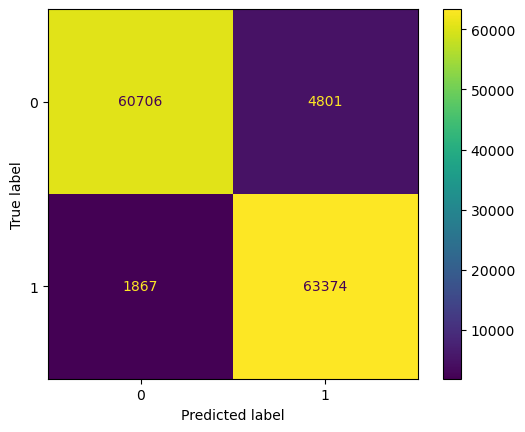

In [13]:
ConfusionMatrixDisplay.from_estimator(logit, X_val, y_val);

Our ROC curve, along with the area underneath it, shows that our model has a high probability of correctly labeling `MALIGNANT` connections. However, there are still some connections slipping through the cracks, as indicated by our confusion matrix, which reports **1867** misclassifications. To enhance model convergence, our next step is to implement a StandardScaler, which will help improve the model's performance and enable better classification accuracy.

In [14]:
#Scaling Data to help it converge
ss = StandardScaler()
ss.fit(X_train)

X_train_t = ss.transform(X_train)
X_val_t = ss.transform(X_val)

In [15]:
logit = LogisticRegression(C=1,penalty='l2',max_iter=1000,random_state=123)
logit.fit(X_train_t,y_train);

In [16]:
train_score = logit.score(X_train_t,y_train)
val_score = logit.score(X_val_t,y_val)

print(f'Training score: {round(train_score,4)}\nValidation score: {round(val_score,4)}')

Training score: 0.9921
Validation score: 0.9913


In [17]:
y_pred = logit.predict(X_val_t)
result = classification_report(y_val,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     65507
           1       0.99      0.99      0.99     65241

    accuracy                           0.99    130748
   macro avg       0.99      0.99      0.99    130748
weighted avg       0.99      0.99      0.99    130748



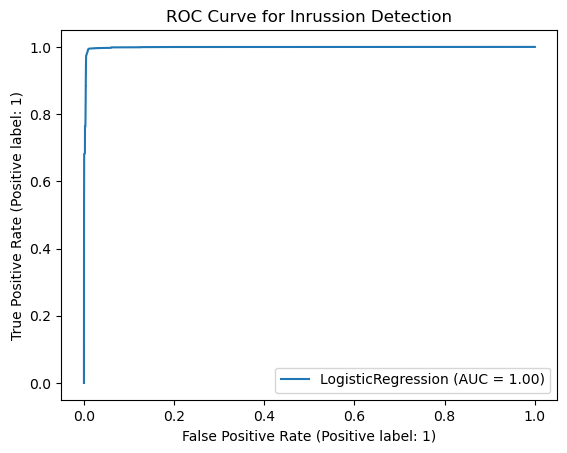

Area under curve (AUC):0.9983623862428368


In [18]:
RocCurveDisplay.from_estimator(logit, X_val_t, y_val)
plt.title('ROC Curve for Inrussion Detection')
plt.show()

y_proba = logit.predict_proba(X_val_t)[:,1]
roc_auc = roc_auc_score(y_val, y_proba)
print(f'Area under curve (AUC):{roc_auc}')

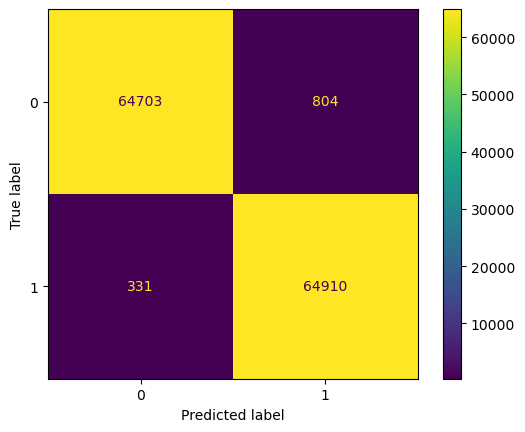

In [19]:
ConfusionMatrixDisplay.from_estimator(logit, X_val_t, y_val);

The incorporation of a scaler has notably enhanced our model's performance, indicating that the previous relatively lower scores were indeed influenced by the model's failure to converge properly. When comparing the current metrics to the previous ones, we observe a considerable improvement. Our ROC curve demonstrates a higher probability of accurately classifying connections, and we now our confusion matrix shows that we have missclassified **331** data points. This shows a **17.72%** increase in our recall rate which is fenomenal.

Now, let's evaluate the performance of our improved model on the test set, which retains the imbalanced data distribution we observed during the exploratory data analysis (EDA). This evaluation will provide valuable insights into how effectively our model is learning and its ability to adapt to the imbalanced dataset.

In [24]:
#Importing our test set and splitting its components
test_df = pd.read_csv('processed/Test.csv')

X_test = test_df.drop(columns='Class')
y_test = test_df['Class']

In [25]:
#Scaling our test set since we trained our model in scaled data
X_test_t = ss.transform(X_test)

In [28]:
test_score = logit.score(X_test_t,y_test)

print(f'Training score: {round(train_score,4)}\nValidation score: {round(val_score,4)}\nTest score:{round(test_score,4)}')

Training score: 0.9921
Validation score: 0.9913
Test score:0.9902


In [29]:
y_pred = logit.predict(X_test_t)
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    475825
           1       0.96      1.00      0.98    140087

    accuracy                           0.99    615912
   macro avg       0.98      0.99      0.99    615912
weighted avg       0.99      0.99      0.99    615912



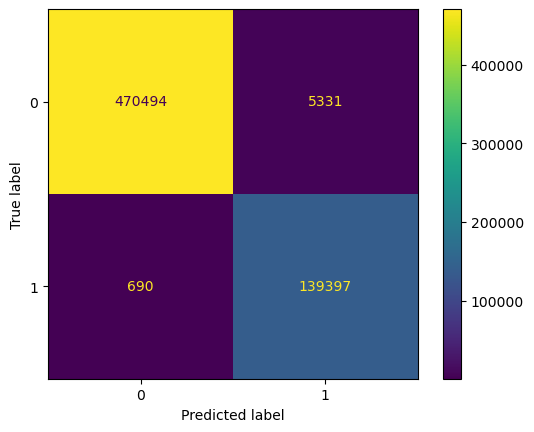

In [26]:
ConfusionMatrixDisplay.from_estimator(logit, X_test_t, y_test);

The test results demonstrate that our model has indeed learned some underlying patterns of the data, as evidenced by the high accuracy score despite the imbalanced dataset. However, as anticipated, the recall score is lower than before, as we have allowed a higher number of connections to be misclassified as `BENIGN` when they should be labeled as `MALIGNANT`.

With the insights gained from this notebook, we will now focus on improving the results through hyperparameter optimization and exploring new types of models on our data. By applying the lessons learned, we aim to enhance our model's performance and achieve more accurate and reliable predictions in future iterations.